<a href="https://colab.research.google.com/github/winteryao7/DeepLearningTutorial/blob/main/Deep_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import shuffle

In [ ]:
!nvidia-smi

Thu Feb  3 15:08:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##What are neural networks?

They're just functions! 
* Between input and output data pairs, such that a specified loss (error) function is minimized.
* Comprised of neurons, arranged in layers.  Each neuron is a linear combination of its inputs, plus a bias term, passed through an activation function.
* A "deep" neural network is just a network with many layers- the basic theory is no different.
* Suitable for most (all?) machine learning problems, but most commonly applied to supervised learning problems such as regression or classification. 

\
**Simple Fully Connected Neural Network (FNN)**\
![](https://drive.google.com/uc?export=view&id=1RZXDZjj4uBpf0LMFFaxJVPAcEXLDj9-M) \
Credit: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

* h1_out = sigmoid(.05\*.15 + .1\*.25)

\
**Common Activation Functions**\
![](https://drive.google.com/uc?export=view&id=1bufxE29IzvbtNiHjTDCSRIeoHUVc52xQ) \
Credit: https://www.goeduhub.com/10050/activation-functions-in-neural-network

* Activation functions introduce non-linearity.
* The choice of activation function has implications when it comes to the network's speed of convergence (we'll revisit this after discussing gradient descent).
 * ReLU converges ~6x faster than sigmoid.

### Demo: learning sin(x), ln(x), and a polynomial on some small domains

In [ ]:
poly = lambda x: x**2 + 1 # Change me!

# Domains
X_sin = np.linspace(0.0, 2.0*np.pi, 10000).reshape(-1,1)
X_ln = np.linspace(1.0, 10.0, 10000).reshape(-1,1)
X_poly = np.linspace(-10.0, 10.0, 10000).reshape(-1,1)

# Ground Truth
y_sin = np.sin(X_sin)
y_ln = np.log(X_ln)
y_poly = poly(X_poly)

In [ ]:
# sin(x) network (w/o activations)
inp_sin_lin = Input(shape=(1,1))
d1_sin_lin = Dense(50)(inp_sin_lin)
d2_sin_lin = Dense(50)(d1_sin_lin)
output_sin_lin = Dense(1)(d2_sin_lin)

# sin(x) network (w/ activations)
inp_sin_nonlin = Input(shape=(1,1))
d1_sin_nonlin = Dense(50, activation='relu')(inp_sin_nonlin)
d2_sin_nonlin = Dense(50, activation='relu')(d1_sin_nonlin)
output_sin_nonlin = Dense(1)(d2_sin_nonlin)

# ln(x) network (w/o activations)
inp_ln_lin = Input(shape=(1,1))
d1_ln_lin = Dense(50)(inp_ln_lin)
d2_ln_lin = Dense(50)(d1_ln_lin)
output_ln_lin = Dense(1)(d2_ln_lin)

# ln(x) network (w/ activations)
inp_ln_nonlin = Input(shape=(1,1))
d1_ln_nonlin = Dense(50, activation='relu')(inp_ln_nonlin)
d2_ln_nonlin = Dense(50, activation='relu')(d1_ln_nonlin)
output_ln_nonlin = Dense(1)(d2_ln_nonlin)

# polynomial network (w/o activations)
inp_poly_lin = Input(shape=(1,1))
d1_poly_lin = Dense(50)(inp_poly_lin)
d2_poly_lin = Dense(50)(d1_poly_lin)
output_poly_lin = Dense(1)(d2_poly_lin)

# polynomial network (w/ activations)
inp_poly_nonlin = Input(shape=(1,1))
d1_poly_nonlin = Dense(50, activation='relu')(inp_poly_nonlin)
d2_poly_nonlin = Dense(50, activation='relu')(d1_poly_nonlin)
output_poly_nonlin = Dense(1)(d2_poly_nonlin)

model_sin_lin = Model(inputs=inp_sin_lin, outputs=output_sin_lin)
model_sin_nonlin = Model(inputs=inp_sin_nonlin, outputs=output_sin_nonlin)
model_ln_lin = Model(inputs=inp_ln_lin, outputs=output_ln_lin)
model_ln_nonlin = Model(inputs=inp_ln_nonlin, outputs=output_ln_nonlin)
model_poly_lin = Model(inputs=inp_poly_lin, outputs=output_poly_lin)
model_poly_nonlin = Model(inputs=inp_poly_nonlin, outputs=output_poly_nonlin)

In [ ]:
print('Training linear sin(x) network...')
model_sin_lin.compile(optimizer='adam', loss='mse')
model_sin_lin.fit(X_sin, y_sin, batch_size=32, epochs=25)

print('\n\nTraining non-linear sin(x) network...')
model_sin_nonlin.compile(optimizer='adam', loss='mse')
model_sin_nonlin.fit(X_sin, y_sin, batch_size=32, epochs=25)

print('\n\nTraining linear ln(x) network...')
model_ln_lin.compile(optimizer='adam', loss='mse')
model_ln_lin.fit(X_ln, y_ln, batch_size=32, epochs=25)

print('\n\nTraining non-linear ln(x) network...')
model_ln_nonlin.compile(optimizer='adam', loss='mse')
model_ln_nonlin.fit(X_ln, y_ln, batch_size=32, epochs=25)

print('\n\nTraining linear polynomial network...')
model_poly_lin.compile(optimizer='adam', loss='mse')
model_poly_lin.fit(X_poly, y_poly, batch_size=32, epochs=25)

print('\n\nTraining non-linear polynomial network...')
model_poly_nonlin.compile(optimizer='adam', loss='mse')
model_poly_nonlin.fit(X_poly, y_poly, batch_size=32, epochs=25)

Training linear sin(x) network...
Epoch 1/25
313/313 [==============================] - 4s 6ms/step - loss: 0.3752
Epoch 2/25
313/313 [==============================] - 2s 6ms/step - loss: 0.1998
Epoch 3/25
313/313 [==============================] - 2s 7ms/step - loss: 0.2008
Epoch 4/25
313/313 [==============================] - 2s 6ms/step - loss: 0.1998
Epoch 5/25
313/313 [==============================] - 2s 5ms/step - loss: 0.2021
Epoch 6/25
313/313 [==============================] - 1s 3ms/step - loss: 0.2013
Epoch 7/25
313/313 [==============================] - 1s 3ms/step - loss: 0.2012
Epoch 8/25
313/313 [==============================] - 1s 3ms/step - loss: 0.2021
Epoch 9/25
313/313 [==============================] - 1s 3ms/step - loss: 0.2024
Epoch 10/25
313/313 [==============================] - 1s 3ms/step - loss: 0.1991
Epoch 11/25
313/313 [==============================] - 1s 3ms/step - loss: 0.1998
Epoch 12/25
313/313 [==============================] - 1s 3ms/step - loss

In [ ]:
y_hat_sin_lin = model_sin_lin.predict(X_sin).squeeze()
y_hat_sin_nonlin = model_sin_nonlin.predict(X_sin).squeeze()

y_hat_ln_lin = model_ln_lin.predict(X_ln).squeeze()
y_hat_ln_nonlin = model_ln_nonlin.predict(X_ln).squeeze()

y_hat_poly_lin = model_poly_lin.predict(X_poly).squeeze()
y_hat_poly_nonlin = model_poly_nonlin.predict(X_poly).squeeze()

# Wider domains
X_sin_wide = np.linspace(-2.0*np.pi, 4.0*np.pi, 10000).reshape(-1,1)
X_ln_wide = np.linspace(1, 20, 10000).reshape(-1,1)
X_poly_wide = np.linspace(-20, 20, 10000).reshape(-1,1)

y_sin_wide = np.sin(X_sin_wide)
y_hat_sin_wide = model_sin_nonlin.predict(X_sin_wide).squeeze()

y_ln_wide = np.log(X_ln_wide)
y_hat_ln_wide = model_ln_nonlin.predict(X_ln_wide).squeeze()

y_poly_wide = poly(X_poly_wide)
y_hat_poly_wide = model_poly_nonlin.predict(X_poly_wide).squeeze()

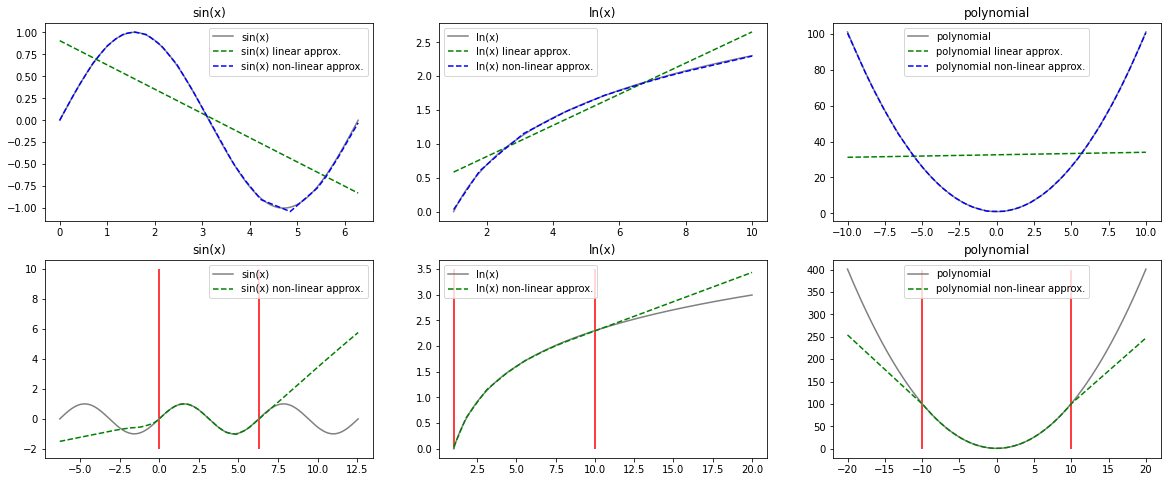

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(20,8))

axs[0,0].plot(X_sin, y_sin, color='gray', label='sin(x)')
axs[0,0].plot(X_sin, y_hat_sin_lin, '--', color='g', label='sin(x) linear approx.')
axs[0,0].plot(X_sin, y_hat_sin_nonlin, '--', color='b', label='sin(x) non-linear approx.')
axs[0,0].title.set_text('sin(x)')
axs[0,0].legend()

axs[0,1].plot(X_ln, y_ln, color='gray', label='ln(x)')
axs[0,1].plot(X_ln, y_hat_ln_lin, '--', color='g', label='ln(x) linear approx.')
axs[0,1].plot(X_ln, y_hat_ln_nonlin, '--', color='b', label='ln(x) non-linear approx.')
axs[0,1].title.set_text('ln(x)')
axs[0,1].legend()

axs[0,2].plot(X_poly, y_poly, color='gray', label='polynomial')
axs[0,2].plot(X_poly, y_hat_poly_lin, '--', color='g', label='polynomial linear approx.')
axs[0,2].plot(X_poly, y_hat_poly_nonlin, '--', color='b', label='polynomial non-linear approx.')
axs[0,2].title.set_text('polynomial')
axs[0,2].legend()

# ----------------------------------------------------------------------------------------------

axs[1,0].plot(X_sin_wide, y_sin_wide, color='gray', label='sin(x)')
axs[1,0].plot(X_sin_wide, y_hat_sin_wide, '--', color='g', label='sin(x) non-linear approx.')
axs[1,0].vlines([0, 2.0*np.pi], [-2,-2], [10, 10], color='red')
axs[1,0].title.set_text('sin(x)')
axs[1,0].legend()

axs[1,1].plot(X_ln_wide, y_ln_wide, color='gray', label='ln(x)')
axs[1,1].plot(X_ln_wide, y_hat_ln_wide, '--', color='g', label='ln(x) non-linear approx.')
axs[1,1].vlines([1, 10], [0,0], [3.5, 3.5], color='red')
axs[1,1].title.set_text('ln(x)')
axs[1,1].legend()

axs[1,2].plot(X_poly_wide, y_poly_wide, color='gray', label='polynomial')
axs[1,2].plot(X_poly_wide, y_hat_poly_wide, '--', color='g', label='polynomial non-linear approx.')
axs[1,2].vlines([-10, 10], [0,0], [400, 400], color='red')
axs[1,2].title.set_text('polynomial')
axs[1,2].legend()

plt.show();

### Network Training

* Network weights are optimized by gradient descent via backpropagation.
* Loss is a function of the network weights, so we want the weights that minimize the error.
* Loss function is not "nice" (local minima).

![](https://drive.google.com/uc?export=view&id=16YgCZnJAKDg6RG114bmRAelieup8aOtR) \
Credit: https://towardsdatascience.com/part-2-gradient-descent-and-backpropagation-bf90932c066a

* [Backpropagation example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
* Mini-batch gradient descent.
 * Optimized using adam.
* Dataset is iterated over multiple times (epochs) until convergence.
* In practice, derivatives are found with [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).  In Tensorflow this is implemented by the [GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) class.  This makes implementing custom network layers easy (more on that later!).

## Convolutional Neural Networks (CNN)

CNNs are the foundation of computer vision.  They are used for analyzing images or data analogous to images (e.g. spectrograms).  CNNs are fundamentally the same as FNNs.  Both are comprised of linear combinations and activation functions and are both optimized using gradient descent/backpropagation.  There are two main differences:
1. Neurons don't receive input from every neuron in the previous layer (not fully connected).
2. Neurons in a layer share weights.

**Typical CNN architecture**\
![](https://drive.google.com/uc?export=view&id=1GbYf78MT1ulx-xNYbn77CAcqu7H5iYDb) \
Credit: https://shafeentejani.github.io/2016-12-20/convolutional-neural-nets/

Example layer: https://cs231n.github.io/convolutional-networks/#conv

**Plotting the filters**\
![](https://drive.google.com/uc?export=view&id=15ZG6Y1CGCVJodSrSGaxvHsgn_lWDXPUj) \
Credit: https://blogs.nvidia.com/blog/2018/08/02/supervised-unsupervised-learning/
* As we get deeper into the network, the filters have a broader view of the "image" (due to pooling) and begin to learn more and more abstract/semantic patterns.

Stanford's cs231n course is excellent for learning the details of computer vision and CNNs.
* Course website: http://cs231n.stanford.edu/
* Course notes: https://cs231n.github.io/
* Lectures: https://youtube.com/playlist?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv

### Demo: rock, paper, scissors image classification

In [ ]:
rps_ds, info = tfds.load('rock_paper_scissors', split=['train', 'test'], with_info=True, as_supervised=True)
rps_train = rps_ds[0]
rps_test = rps_ds[1]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete9CMXGY/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete9CMXGY/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


{'test': <tfds.core.SplitInfo num_examples=372>, 'train': <tfds.core.SplitInfo num_examples=2520>}
{'image': (300, 300, 3), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(300, 300, 3)
<dtype: 'uint8'>


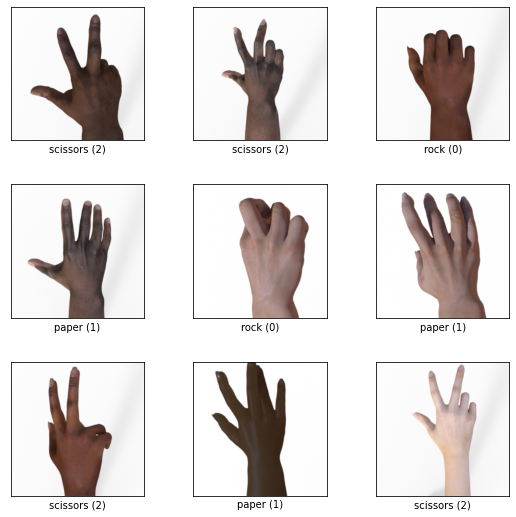

In [ ]:
print(info.splits)
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

fig = tfds.show_examples(rps_train, info)

In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

rps_train = rps_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
rps_train = rps_train.cache()
rps_train = rps_train.shuffle(info.splits['train'].num_examples)
rps_train = rps_train.batch(128)
rps_train = rps_train.prefetch(tf.data.AUTOTUNE)

rps_test = rps_test.map(
     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
rps_test = rps_test.batch(128)
rps_test = rps_test.cache()
rps_test = rps_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Nothing special about this network, but it's the general "Shape" of CNNs
# talk about what the general shape is -> conv - pool - dense...

inp = Input(shape=(300,300,3))
conv1 = Conv2D(2, (3,3), activation='relu', padding='same')(inp)
pool1 = MaxPooling2D((4,4), padding='same')(conv1)
conv2 = Conv2D(2, (3,3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((4,4), padding='same')(conv2)
conv3 = Conv2D(2, (3,3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((4,4), padding='same')(conv3)
conv4 = Conv2D(1, (3,3), activation='relu', padding='same')(pool3)
flat = Flatten()(conv4)
dense1 = Dense(10, activation='relu')(flat)
out = Dense(3, activation='softmax')(dense1)

rps_model = Model(inputs=inp, outputs=out)
rps_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 2)         38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 2)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 2)         38  

In [ ]:
rps_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
rps_model.fit(rps_train, epochs=30, validation_data=rps_test)

Epoch 1/30
20/20 [==============================] - 16s 169ms/step - loss: 1.0797 - sparse_categorical_accuracy: 0.4960 - val_loss: 1.0737 - val_sparse_categorical_accuracy: 0.4113
Epoch 2/30
20/20 [==============================] - 2s 81ms/step - loss: 1.0476 - sparse_categorical_accuracy: 0.5687 - val_loss: 1.0523 - val_sparse_categorical_accuracy: 0.4086
Epoch 3/30
20/20 [==============================] - 2s 81ms/step - loss: 0.9938 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.0128 - val_sparse_categorical_accuracy: 0.4086
Epoch 4/30
20/20 [==============================] - 2s 80ms/step - loss: 0.9045 - sparse_categorical_accuracy: 0.6135 - val_loss: 0.9600 - val_sparse_categorical_accuracy: 0.4328
Epoch 5/30
20/20 [==============================] - 2s 80ms/step - loss: 0.7859 - sparse_categorical_accuracy: 0.6286 - val_loss: 0.9212 - val_sparse_categorical_accuracy: 0.4758
Epoch 6/30
20/20 [==============================] - 2s 80ms/step - loss: 0.6579 - sparse_categorical_ac

In [ ]:
# Load custom test images

from google.colab import drive
drive.mount('/content/drive')

RPS_PATH = '/content/drive/Shared drives/Capstone/Deep Learning Tutorial/Rock Paper Scissors/'
file_names = ['rock1.jpg', 'rock2.jpg', 'paper1.jpg', 'paper2.jpg', 'scissors1.jpg', 'scissors2.jpg']

images = []
np_images = np.zeros((6, 300, 300, 3))

for i in range(len(file_names)):
  file_name = file_names[i]
  img = Image.open(RPS_PATH + file_name)
  images.append(img)
  np_images[i,:,:,:] = np.asarray(img)

np_images = np_images/255.

Mounted at /content/drive


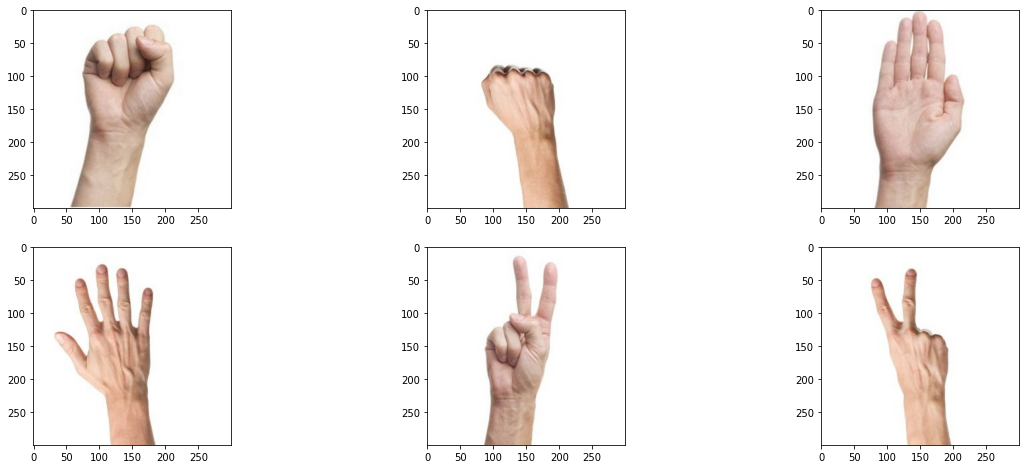

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(20,8))

for i in range(2):
  for j in range(3):
    axs[i,j].imshow(images[i*3 + j])

In [ ]:
# 0 = rock, 1 = paper, 2 = scissors

y_pred = rps_model.predict(np_images)
print(y_pred)
print(np.argmax(y_pred, axis=1)) # 4/6 correct = 67% accuracy

[[2.5216976e-01 7.1722254e-02 6.7610794e-01]
 [9.9940145e-01 5.9560995e-04 2.9801658e-06]
 [2.5163591e-03 9.5966464e-01 3.7819017e-02]
 [1.3972339e-04 9.3769717e-01 6.2163059e-02]
 [1.9448885e-04 8.0840939e-01 1.9139610e-01]
 [8.9621608e-04 9.8850816e-01 1.0595651e-02]]
[2 0 1 1 1 1]


The model isn't great.  Could try a few things to improve it, but they're beyond the scope of this tutorial.
* Improve data quality
* Dropout
* Batch normalization
* Dataset augmentation
 * Rotation, translation, scaling, deformation, etc

Mostly baseless theory: going by the preview images, the training data could be primarly dark-skinned people.  This probably isn't true, but it's an opportunity to discuss the issue of non-representative training data.
* https://www.cnet.com/news/new-zealand-facial-recognition-eyes-closed-error-rejected-richard-lee/
 * Facial recognition in cars.
* Not only an issue when it comes to people, but with *any* data (e.g. the functions in the first section).
* Neural networks only understand what they see!

### Demo: Convolutional Autoencoder

Autoencoders are similar to standard CNNs, but they have an expansive path in addition to the contracting path.  The idea is to learn a non-linear compression function tailor-made for the dataset.
\
\
![](https://drive.google.com/uc?export=view&id=1dHowtctWiU6RnJ05dixhEQOz2apA8vPt)

In [ ]:
WFORM_PATH = r'/content/drive/Shared drives/Capstone/Data/All EV/10 Hz'

spectrograms = np.load(f'{WFORM_PATH}/spectrograms.npy')
wforms = np.load(f'{WFORM_PATH}/wforms_long_downsample.npy')
wforms = wforms[:, 2, 500:1100]
timestamps = np.load(f'{WFORM_PATH}/timestamps.npy')
pn_probs = np.load(f'{WFORM_PATH}/pn_probs.npy')

x = spectrograms[:,0:16,4:60]

x, wforms, timestamps, pn_probs = shuffle(x, wforms, timestamps, pn_probs, random_state=42)

y=None

x.shape

In [ ]:
idx = 3850
wform = wforms[idx]
spectrogram = x[idx]

fig, axs = plt.subplots(2,1, figsize=(8,6))

axs[0].plot(wform)
axs[0].title.set_text('Mining Blast Waveform')

axs[1].imshow(spectrogram, origin='lower');
axs[1].title.set_text('Short-time Fourier Transform Spectrogram')

In [ ]:
inp = Input(shape=(16, 56, 1))
e = Conv2D(4, (4, 4), activation='tanh', padding='same')(inp) #12, 8
e = MaxPooling2D((2, 2), padding='same')(e)
e = Conv2D(8, (3, 3), activation='tanh', padding='same')(e)
e = MaxPooling2D((2, 2), padding='same')(e)
e = Conv2D(1, (2, 2), activation='tanh', padding='same')(e)
e = MaxPooling2D((2, 2), padding='same')(e)

shape_before_flattening = K.int_shape(e)
encoded = Flatten()(e)
d = Reshape(shape_before_flattening[1:])(encoded)

d = Conv2D(1, (2, 2), activation='tanh', padding='same')(d)
d = UpSampling2D((2, 2))(d)
d = Conv2D(8, (3, 3), activation='tanh', padding='same')(d)
d = UpSampling2D((2, 2))(d)
d = Conv2D(4, (4, 4), activation='tanh', padding='same')(d)
d = UpSampling2D((2, 2))(d)
decoded = Conv2D(1, (3, 3), padding='same')(d)

autoencoder = Model(inputs=inp, outputs=decoded, name='autoencoder')
encoder = Model(inputs=inp, outputs=encoded, name='encoder')
decoder = Model(inputs=encoded, outputs=decoded, name='decoder')
autoencoder.summary()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x, x, batch_size=128, epochs=50)

In [ ]:
spectrogram_reconstructed = autoencoder.predict(x[idx].reshape(-1,16,56)).squeeze()

fig, axs = plt.subplots(2,1, figsize=(8,6))

axs[0].imshow(spectrogram, origin='lower');
axs[0].title.set_text('Original Spectrogram')

axs[1].imshow(spectrogram_reconstructed, origin='lower');
axs[1].title.set_text('Reconstructed Spectrogram')

### Theoretical Notes

CNNs:
* Solve the curse of dimensionality.
* Learn invariants.
 * Early layers -> physical invariants (e.g. translation, scaling, rotation)
 * Later layers -> abstract/semantic invariants (e.g. where an eye or nose is, or whether a cat is sitting up or laying down)
* Learn linear feature spaces.  That is, you can't add two pictures of faces together and get a new face.  However, if you add the two images' feature vectors, and then decode them, you'll get a new face with properties from each.

\

![](https://drive.google.com/uc?export=view&id=1PHS_NoDkjZMYyMAGgLGkK5v4_HpmICYL)
Taken from https://youtu.be/wHhYvtnY2zI

\

![](https://drive.google.com/uc?export=view&id=10WDJgA97ueWhmgTeY3KmsEAsEm1xPHcS)\
Taken from https://youtu.be/0wRItoujFTA


## Other types of neural networks
Recurrent Neural Networks
* Not in my wheelhouse.
* LSTM (Long short-term memory) has a mechanism for keeping a state as it iterates through sequences (e.g. text)
* More the domain of natural language processing (NLP).

Generative Adversarial Networks
* Learn the distribution of a dataset, and can generate new examples.